# NLP stuff
Getting names out of the post text

In [1]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")

In [2]:
post_text = "Long post, but it’s worth it! 'You can easily judge the character of a man by how he treats those who can do nothing for him.' ~Johann Wolfgang Goethe In this case it’s not a man, but Anna Florczyk from our 7th grade class. At last week’s State XC Meet Anna’s character was on full display. Below is an excerpt of an email we received today and a picture where Anna can be seen encouraging a Wolf Branch runner instead of passing her. We also took the time to recognize Anna today for her outstanding sportsmanship and leadership with a surprise presentation in the gym. Here is the email: 'I wanted to share a story with you from this weekend's State competition. Our runner was struggling during the race with stomach cramps and some breathing issues. She was definitely ready to quit towards the end. There was a competitor who was running next to her and could be clearly heard providing her encouragement and support - 'Don't quit! You got this! Not much further now!' It was really awesome to see this type of sportsmanship between two athletes who have never met competing against each other. Her kindness did not go unnoticed. This young lady should be recognized for her character.' Great job, Anna!"
post_nlp = nlp(post_text)

In [3]:
for ent in post_nlp.ents:
  print(ent.text, ent.label_)

Wolfgang Goethe PERSON
Anna Florczyk PERSON
7th ORDINAL
last week DATE
State ORG
Meet Anna PERSON
today DATE
Anna PERSON
Wolf Branch PERSON
Anna PERSON
today DATE
weekend DATE
two CARDINAL
Anna PERSON


In [4]:
entities = [(e.text, e.label_) for e in post_nlp.ents]
entities_df = pd.DataFrame(entities, columns = ["text", "entity"])
entities_df

,text,entity
0,Wolfgang Goethe,PERSON
1,Anna Florczyk,PERSON
2,7th,ORDINAL
3,last week,DATE
4,State,ORG
5,Meet Anna,PERSON
6,today,DATE
7,Anna,PERSON
8,Wolf Branch,PERSON
9,Anna,PERSON


In [5]:
entities_df[entities_df["entity"] == "PERSON"]

,text,entity
0,Wolfgang Goethe,PERSON
1,Anna Florczyk,PERSON
5,Meet Anna,PERSON
7,Anna,PERSON
8,Wolf Branch,PERSON
9,Anna,PERSON
13,Anna,PERSON


# Facial recognition stuff

In [6]:
import face_recognition
from PIL import  Image, ImageDraw

In [8]:
img1 = face_recognition.load_image_file("kids-running.jpg")

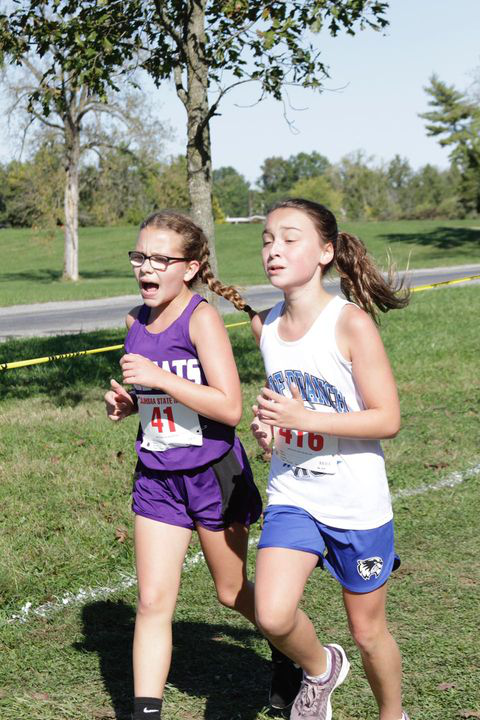

In [9]:
Image.open("kids-running.jpg")

In [10]:
face_locations = face_recognition.face_locations(img1)

In [11]:
# check out how many faces, should be 2
n_faces = len(face_locations)
print(f'There were {n_faces} faces detected.')

There were 2 faces detected.


In [12]:
face_locations

[(218, 308, 281, 246), (239, 183, 301, 121)]

In [13]:
img1_rgb = Image.fromarray(img1, "RGB")
img_display = img1_rgb.copy()
img_display_draw = ImageDraw.Draw(img_display)


In [14]:
for face_location in face_locations:
  img_display_draw.rectangle(
    [
      (face_location[3], face_location[0]),
      (face_location[1], face_location[2])
    ],
    outline = "blue",
    width = 3
  )


In [15]:
img_display.show()

In [16]:
img2 = face_recognition.load_image_file("kids-lunch.jpg")

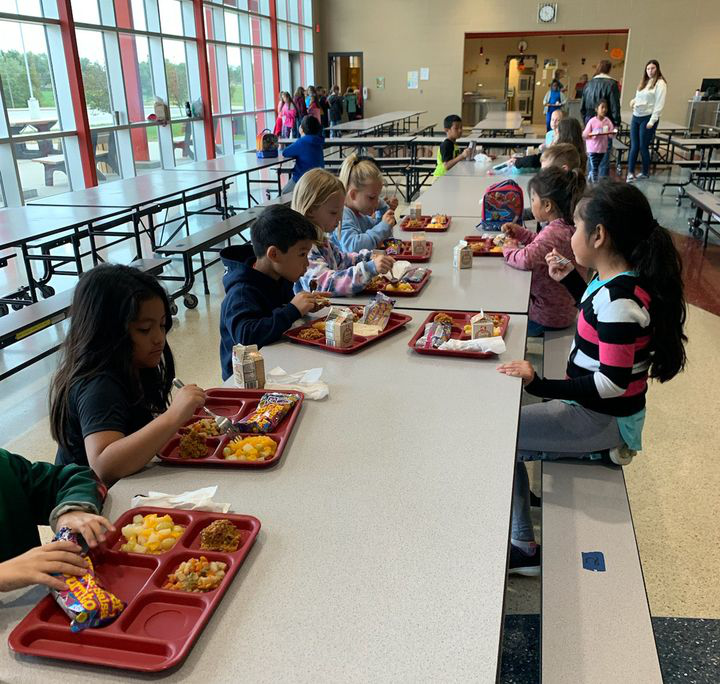

In [17]:
Image.open("kids-lunch.jpg")

In [18]:
face_locations2 = face_recognition.face_locations(img2)
n_faces = len(face_locations2)
print(f'There were {n_faces} faces detected.')


There were 0 faces detected.


In [54]:
img2_rgb = Image.fromarray(img2, "RGB")
img_display2 = img2_rgb.copy()
img_display_draw2 = ImageDraw.Draw(img_display2)


In [55]:
for face_location in face_locations2:
  img_display_draw2.rectangle(
      [
          (face_location[3], face_location[0]),
          (face_location[1], face_location[2])
      ],
      outline="blue",
      width=3
  )


In [56]:
img_display2.show()

In [57]:
face_locations2

[]

# Extracting text from pics

In [19]:
import easyocr
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

reader = easyocr.Reader(["en"])


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## Easy example

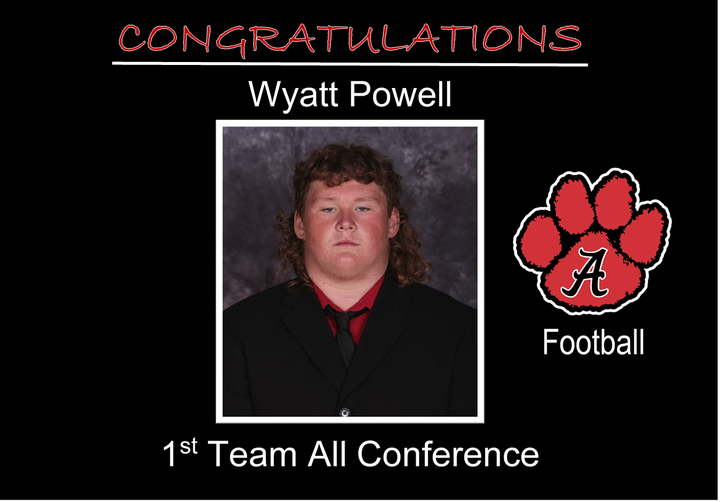

In [59]:
footballer = Image.open("footballer.png")
footballer

In [20]:
footballer_easyocr = reader.readtext("footballer.png")
footballer_easyocr

[([[111, 10], [588, 10], [588, 65], [111, 65]],
  'CONGRATULATIONS',
  0.9423684865228288),
 ([[243, 71], [460, 71], [460, 121], [243, 121]],
  'Wyatt Powell',
  0.9965369134584934),
 ([[560, 242], [616, 242], [616, 304], [560, 304]], 'J', 0.31704386376441107),
 ([[539, 323], [651, 323], [651, 361], [539, 361]],
  'Football',
  0.999965312894484),
 ([[159, 433], [545, 433], [545, 477], [159, 477]],
  '1st Team AIl Conference',
  0.6647863755540576)]

In [61]:
footballer_easyocr[1][1]

'Wyatt Powell'

## Harder example

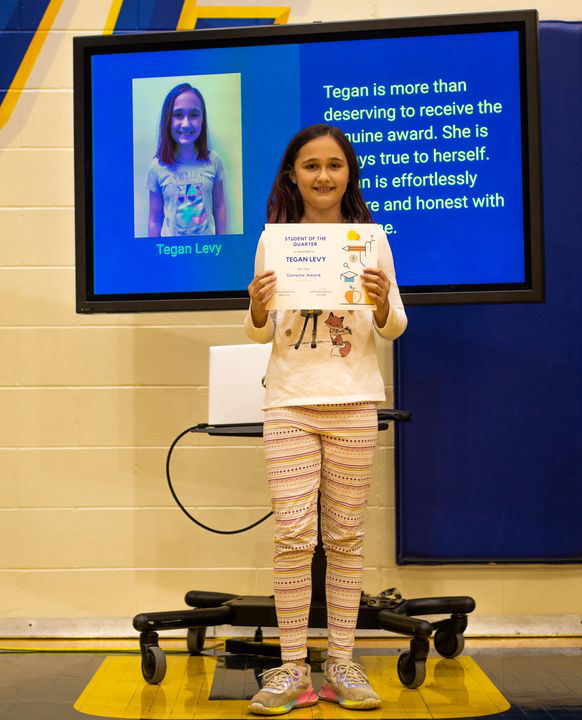

In [62]:
spelling_bee = Image.open("spelling-bee.jpg")
spelling_bee

In [21]:
spelling_bee_easyocr = reader.readtext("spelling-bee.jpg")
spelling_bee_easyocr


[([[318, 76], [472, 76], [472, 104], [318, 104]],
  'Tegan is more than',
  0.7945848953267366),
 ([[319, 96], [506, 96], [506, 126], [319, 126]],
  'deserving to receive the',
  0.8628311612130652),
 ([[343, 129], [385, 129], [385, 145], [343, 145]],
  'Juine',
  0.44798370990814285),
 ([[382, 120], [492, 120], [492, 147], [382, 147]],
  'award. She is',
  0.8629199925480855),
 ([[352, 141], [490, 141], [490, 172], [352, 172]],
  'ys true to herself.',
  0.7353564692069472),
 ([[354, 168], [482, 168], [482, 192], [354, 192]],
  'in is effortlessly',
  0.8739915723930305),
 ([[364, 192], [472, 192], [472, 216], [364, 216]],
  're and honest',
  0.9945746728308142),
 ([[291, 233], [329, 233], [329, 249], [291, 249]], '9', 0.1874426746005362),
 ([[155, 243], [225, 243], [225, 259], [155, 259]],
  'Tegan Levy',
  0.9837476599721805),
 ([[286, 256], [326, 256], [326, 262], [286, 262]],
  'Tecaet',
  0.013189473392732565),
 ([[466.8905996075495, 190.3358994113243],
   [506.6714109594025, 18

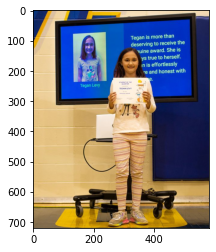

In [22]:
img_1 = cv2.imread("spelling-bee.jpg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)


In [23]:
# if OCR prob is over 0.5, overlay bounding box and text
for (bbox, text, prob) in spelling_bee_easyocr:
    if prob >= 0.5:
        # display
        print(f'Detected text: {text} (Probability: {prob:.2f})')

        # get top-left and bottom-right bbox vertices
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = (int(top_left[0]), int(top_left[1]))
        bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

        # create a rectangle for bbox display
        cv2.rectangle(img=img_1, pt1=top_left, pt2=bottom_right,
                      color=(255, 0, 0), thickness=10)

        # put recognized text
        # cv2.putText(img=img_1, text=text, org=(
        #     top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)


Detected text: Tegan is more than (Probability: 0.79)
Detected text: deserving to receive the (Probability: 0.86)
Detected text: award. She is (Probability: 0.86)
Detected text: ys true to herself. (Probability: 0.74)
Detected text: in is effortlessly (Probability: 0.87)
Detected text: re and honest (Probability: 0.99)
Detected text: Tegan Levy (Probability: 0.98)
Detected text: with (Probability: 1.00)


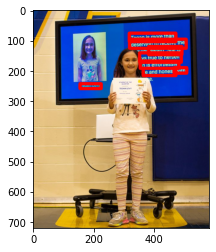

In [24]:
plt.imshow(img_1)

In [25]:
print(spelling_bee_easyocr[1][1])
print(spelling_bee_easyocr[2][1])

txt = " ".join([txt[1] for txt in spelling_bee_easyocr])
txt


deserving to receive the
Juine


'Tegan is more than deserving to receive the Juine award. She is ys true to herself. in is effortlessly re and honest 9 Tegan Levy Tecaet with'

### Grab names from the extracted text

In [26]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")

In [27]:
footballer_txt = [txt[1] for txt in footballer_easyocr]
footballer_txt = " ".join(footballer_txt)
footballer_txt


'CONGRATULATIONS Wyatt Powell J Football 1st Team AIl Conference'

In [28]:
footballer_nlp = nlp(footballer_txt)
for ent in footballer_nlp.ents:
  print(ent.text, ent.label_)

Wyatt Powell J Football 1st PERSON


### Try with the harder example

In [29]:
img_nlp = nlp(txt)
for ent in img_nlp.ents:
  print(ent.text, ent.label_)

Tegan GPE
9 CARDINAL


In [72]:
img_nlp

Tegan is more than deserving to receive the Juine award. She is ys true to herself. in is effortlessly re and honest 9 Tegan Levy Tecaet with

I'm happy with the text extraction but for some reason "Tegan" is not being recognized as a name.

## Try something different from spaCy

In [30]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch

model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [31]:
inputs = tokenizer(txt, return_tensors="pt")
tokens = inputs.tokens()

outputs = model(**inputs).logits
predictions = torch.argmax(outputs, dim=2)

In [76]:
model.config.id2label

{0: 'O',
 1: 'B-MISC',
 2: 'I-MISC',
 3: 'B-PER',
 4: 'I-PER',
 5: 'B-ORG',
 6: 'I-ORG',
 7: 'B-LOC',
 8: 'I-LOC'}

In [32]:
for token, prediction in zip(tokens, predictions[0].numpy()):
    print((token, model.config.id2label[prediction]))

('[CLS]', 'O')
('Te', 'I-PER')
('##gan', 'I-PER')
('is', 'O')
('more', 'O')
('than', 'O')
('des', 'O')
('##er', 'O')
('##ving', 'O')
('to', 'O')
('receive', 'O')
('the', 'O')
('Ju', 'I-MISC')
('##ine', 'I-MISC')
('award', 'O')
('.', 'O')
('She', 'O')
('is', 'O')
('y', 'O')
('##s', 'O')
('true', 'O')
('to', 'O')
('herself', 'O')
('.', 'O')
('in', 'O')
('is', 'O')
('effort', 'O')
('##lessly', 'O')
('re', 'O')
('and', 'O')
('honest', 'O')
('9', 'O')
('Te', 'I-PER')
('##gan', 'I-PER')
('Levy', 'I-PER')
('Te', 'I-PER')
('##ca', 'I-ORG')
('##et', 'I-PER')
('with', 'O')
('[SEP]', 'O')


In [34]:
labels = [model.config.id2label[pred] for pred in predictions[0].numpy()]

In [35]:
d = dict(zip(tokens, labels))
d

{'[CLS]': 'O',
 'Te': 'I-PER',
 '##gan': 'I-PER',
 'is': 'O',
 'more': 'O',
 'than': 'O',
 'des': 'O',
 '##er': 'O',
 '##ving': 'O',
 'to': 'O',
 'receive': 'O',
 'the': 'O',
 'Ju': 'I-MISC',
 '##ine': 'I-MISC',
 'award': 'O',
 '.': 'O',
 'She': 'O',
 'y': 'O',
 '##s': 'O',
 'true': 'O',
 'herself': 'O',
 'in': 'O',
 'effort': 'O',
 '##lessly': 'O',
 're': 'O',
 'and': 'O',
 'honest': 'O',
 '9': 'O',
 'Levy': 'I-PER',
 '##ca': 'I-ORG',
 '##et': 'I-PER',
 'with': 'O',
 '[SEP]': 'O'}

In [36]:
d = pd.DataFrame(data = d, index = [0]).melt()

In [37]:
d[d["value"] == "I-PER"]

,variable,value
1,Te,I-PER
2,##gan,I-PER
28,Levy,I-PER
30,##et,I-PER


# Try estimating age

In [38]:
from deepface import DeepFace
import cv2

In [39]:
spelling_bee = cv2.imread("spelling-bee.jpg")
footballer = cv2.imread("footballer.png")


In [41]:
spelling_bee_analysis = DeepFace.analyze("spelling-bee.jpg", actions = ["age"])
footballer_analysis = DeepFace.analyze("footballer.png", actions = ["age"])

In [42]:
print(f"""The spelling bee girl is estimated as being {spelling_bee_analysis["age"]} years old""")
print(f"""The footballer is estimated as being {footballer_analysis["age"]} years old""")

The spelling bee girl is estimated as being 21 years old
The footballer is estimated as being 30 years old


Both of the above are pretty outrageously high